In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as op
from matplotlib import cm

t = np.matrix([[-9.0], 
               [-7.0], 
               [-4.0], 
               [-0.5], 
               [1.0], 
               [3.0], 
               [5.0], 
               [7.0], 
               [8.0], 
               [9.0], 
               [9.5], 
               [9.8]])

y = np.matrix([[175.37], 
               [90.32], 
               [40.11], 
               [7.09], 
               [-13.91], 
               [19.76], 
               [65.17], 
               [144.24], 
               [204.97], 
               [287.09], 
               [340.38], 
               [367.47]])

def findXnCoff(t):
    xnCoff = np.matrix(np.zeros((t.shape[0], 3)))
    xnCoff[:, 0] = np.exp(0.5 * t + 1)
    xnCoff[:, 1] = np.power(t, 2)
    xnCoff[:, 2] = 1
    return xnCoff

def f(x, t):
    x = np.squeeze(np.asarray(x))
    var = x[0] * np.exp(0.5 * t + 1) + x[1] * np.power(t, 2) + x[2]
    return var

The analytical form of the $j^{th}$ row of the Jacobi matrix is defined as follows:
$$
J(j,:)=\left[\begin{matrix} e^{0.5t_j+1}&  t_j^2&  1\end{matrix}\right].
$$

In [2]:
# Jacobi Matrix
J = findXnCoff(t)
print('Jacobi Matrix:\n', J)

Jacobi Matrix:
 [[3.01973834e-02 8.10000000e+01 1.00000000e+00]
 [8.20849986e-02 4.90000000e+01 1.00000000e+00]
 [3.67879441e-01 1.60000000e+01 1.00000000e+00]
 [2.11700002e+00 2.50000000e-01 1.00000000e+00]
 [4.48168907e+00 1.00000000e+00 1.00000000e+00]
 [1.21824940e+01 9.00000000e+00 1.00000000e+00]
 [3.31154520e+01 2.50000000e+01 1.00000000e+00]
 [9.00171313e+01 4.90000000e+01 1.00000000e+00]
 [1.48413159e+02 6.40000000e+01 1.00000000e+00]
 [2.44691932e+02 8.10000000e+01 1.00000000e+00]
 [3.14190660e+02 9.02500000e+01 1.00000000e+00]
 [3.65037468e+02 9.60400000e+01 1.00000000e+00]]


In [3]:
#Normal Equation
A = np.transpose(J) * J
x = np.linalg.inv(A) * np.transpose(J) * y
print('Normal Equation Solution:\n', x)

Normal Equation Solution:
 [[ 0.46179928]
 [ 2.17431745]
 [-4.48886173]]


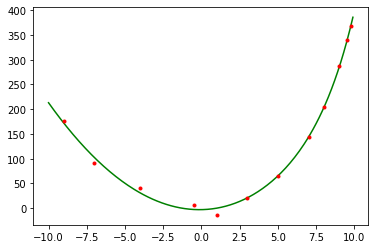

In [4]:
tt = np.arange(-10, 10, 0.1)

plt.plot(tt, f(x, tt), 'g', t, y, 'r.')